In [28]:
%pip install inference_sdk --quiet


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
from dotenv import load_dotenv
import os

# Cargar las variables de entorno del archivo .env
load_dotenv()

# Acceder a la variable de entorno
api_key = os.getenv('API_KEY')

In [31]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=api_key
)

In [13]:
image_path = "/Users/anoguera/Documents/GitHub/WasteRecognition-CV/Test/Carton1.png"
result = CLIENT.infer(image_path, model_id="yolo-waste-detection/1")

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

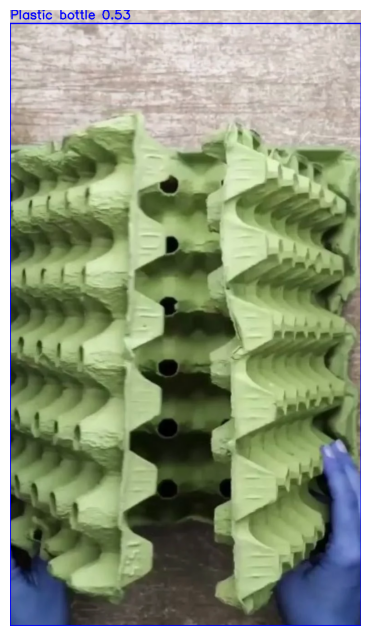

In [18]:
# Cargar la imagen # Actualiza esto a la ruta de tu imagen
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar con matplotlib


# Extrae las predicciones del diccionario 'result'
predictions = result['predictions']

# Dibujar cada bounding box en la imagen
for pred in predictions:
    x = int(pred['x'] - pred['width'] / 2)
    y = int(pred['y'] - pred['height'] / 2)
    w = int(pred['width'])
    h = int(pred['height'])
    top_left = (x, y)
    bottom_right = (x + w, y + h)
    cv2.rectangle(image, top_left, bottom_right, (255, 0, 0), 2)  # Dibuja el rectángulo
    label = f"{pred['class']} {pred['confidence']:.2f}"
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)  # Etiqueta con clase y confianza

# Convertir de BGR a RGB para mostrar correctamente con matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [27]:
import os

# Definir la carpeta que contiene las imágenes
folder_path = "/Users/anoguera/Documents/GitHub/WasteRecognition-CV/Test"
output_folder = "/Users/anoguera/Documents/GitHub/WasteRecognition-CV/Test/output"


# Iterar sobre cada archivo en la carpeta
for filename in os.listdir(folder_path):
    # Asegurarte de que es un archivo de imagen, por ejemplo, con formato PNG
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(folder_path, filename)

        # Realizar la inferencia
        result = CLIENT.infer(image_path, model_id="yolo-waste-detection/1")

        # Cargar la imagen
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar con matplotlib

        # Extraer las predicciones del diccionario 'result'
        predictions = result['predictions']

        for pred in predictions:
            x = int(pred['x'] - pred['width'] / 2)
            y = int(pred['y'] - pred['height'] / 2)
            w = int(pred['width'])
            h = int(pred['height'])
            top_left = (x, y)
            bottom_right = (x + w, y + h)
            cv2.rectangle(image, top_left, bottom_right, (255, 0, 0), 2)  # Dibuja el rectángulo

            # Ajustar la posición de la etiqueta para que siempre sea visible
            label_y = max(30, y - 10)
            label = f"{pred['class']} {pred['confidence']:.2f}"
            # Añadir fondo para mejorar la legibilidad
            cv2.putText(image, label, (x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

        # Opcional: Mostrar la imagen en una ventana
        # plt.figure(figsize=(10, 8))
        # plt.imshow(image)
        # plt.axis('off')
        # plt.show()